In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

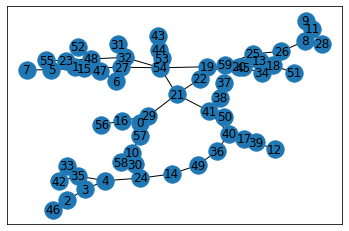

In [9]:
# Number of locations in the city
N = 60
connectivity = 2
p = 0.8

# make a random graph to represent a city network
road_network = nx.connected_watts_strogatz_graph(N, connectivity, p)
nodes = road_network.nodes

nx.draw_networkx(road_network)
plt.show()

In [8]:
class Taxi:
    """
    A taxi class to keep track of the internal state for each taxi.
    """
    def __init__(self, number, start_location):
        self._number = number
        self.available = True
        self.current_location = start_location

        self.source = []
        self.destination = []
        self.path = []
        self.path_generator = None
        self.expected_reward = 0.
        self.customer_wait_time = None

    @property
    def number(self):
        return self._number

    def hire(self, source, destination):
        if self.available == True:
            self.available = False
            self.source = source
            self.destination = destination

            self.set_path_and_reward(source, destination)
            
    def set_path_and_reward(self, source, destination):
        """
        Sets a path from current location to source and then the destination.
        """
        to_customer = nx.shortest_path(road_network, self.current_location,
                                       source)
        to_destination = nx.shortest_path(road_network, source,
                                       destination)
        
        total_path = to_customer+to_destination
        self.path = total_path
        self.path_generator = (p for p in self.path)
        
        cost_to_go_to_customer = len(to_customer)
        trip_reward = 3*len(to_destination)
        
        self.expected_reward = trip_reward - cost_to_go_to_customer
        self.customer_wait_time = len(to_customer)


    def reset(self):
        self.available = True
        
        self.source = []
        self.destination = []
        self.path = []
        self.path_generator = None
        self.expected_reward = 0.


    def step(self):
        if not self.available:
            if self.current_location == self.destination:
                self.reset()
            else:
                self.current_location = next(self.path_generator)        
    
    def __repr__(self):
        return str(self.number)

# Set taxi at location 5
taxi_test = Taxi(33, 2)

# Hire for a delivery from location
taxi_test.hire(9, 14)

print("Total path to travel", taxi_test.path)
print("Total expected reward", taxi_test.expected_reward)
print("Total customer wait time", taxi_test.customer_wait_time)

# Take a few steps
for i in range(5):
    taxi_test.step()
    print("Location: ", taxi_test.current_location)

Total path to travel [2, 6, 7, 11, 48, 57, 56, 1, 20, 49, 9, 9, 49, 20, 1, 56, 57, 48, 11, 54, 15, 14]
Total expected reward 22
Total customer wait time 11
Location:  2
Location:  6
Location:  7
Location:  11
Location:  48


In [ ]:
def qvalue(customer_queue, taxi_queue, action_queue):
    """
    Compute the Q values for the state and action
    """
    
    

In [61]:
total_taxis = 40

In [63]:
taxi_queue = [[] for i in range(N)]

for i in range(total_taxis):
    rand_location = np.random.randint(0, N)
    taxi_queue[rand_location].append(Taxi(i, rand_location))

In [64]:
print(taxi_queue)

[[1], [23], [31], [], [37], [], [7, 16], [], [5], [34], [], [12, 14, 38], [], [], [], [10], [19], [20], [], [11], [3], [], [], [6, 18, 25], [], [8], [], [4], [26], [], [17], [], [22, 35], [], [32], [36], [27, 30], [24], [], [], [33], [21], [], [], [0, 9], [], [], [2], [13], [], [], [15, 28], [], [], [], [], [29], [39], [], []]


In [65]:
def generate_demand(queue):
    """
    Generates demands to go randomly to new locations at each point and adds to queue.
    
    Args:
        queue (list): a list of current demands at each location
    """
    for i, demand in enumerate(np.random.poisson(size=N)):
        possible_destinations = list(nodes)
        possible_destinations.remove(i)
        new_destinations = np.random.choice(possible_destinations, demand)
        [queue[i].append(d) for d in new_destinations.ravel()]
    return queue

In [66]:
np.random.poisson(size=N)

array([2, 3, 3, 2, 0, 3, 2, 1, 0, 5, 3, 1, 0, 3, 0, 0, 1, 1, 0, 1, 3, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       4, 1, 1, 3, 0, 4, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0])

In [67]:
queue = [[] for i in range(N)]

for i in range(3):
    print(generate_demand(queue))
    print("============================================================")

[[], [], [10, 21], [], [2], [], [], [0], [], [7, 28], [16, 4], [3], [11], [], [], [], [], [22], [44], [], [35], [33, 19], [16], [], [31], [], [19], [23, 30], [], [28], [4, 39], [35], [48, 41, 35, 45, 2], [], [0], [], [], [], [23], [53], [53], [], [], [5], [27], [33], [20, 15], [32, 21], [], [10], [33], [57], [27, 8], [16, 11], [31, 6, 50], [], [12], [], [], [0]]
[[47, 46, 40, 26, 48], [], [10, 21], [], [2], [], [12], [0], [10, 47], [7, 28], [16, 4, 38], [3], [11, 21], [17, 53], [32], [2], [], [22], [44], [51], [35], [33, 19, 1, 35], [16], [], [31, 40, 18], [47], [19, 56, 39], [23, 30], [36], [28], [4, 39, 46, 59], [35, 51], [48, 41, 35, 45, 2, 37], [16], [0, 50, 9], [18], [0, 11], [6, 13], [23, 24, 20, 55], [53, 54, 31], [53, 4], [], [], [5], [27], [33], [20, 15, 19, 34], [32, 21, 35, 55], [6, 35, 51], [10, 39, 48], [33, 26], [57], [27, 8, 26, 23], [16, 11], [31, 6, 50, 57], [], [12, 40], [12], [28], [0, 10, 32]]
[[47, 46, 40, 26, 48, 6, 21], [57, 8], [10, 21, 36, 25, 4], [6], [2, 18, 

In [68]:
for i in range(N):
    print("Node {}: \nDemands {}: Taxis available {}".format(i, queue[i], taxi_queue[i]))

Node 0: 
Demands [47, 46, 40, 26, 48, 6, 21]: Taxis available [1]
Node 1: 
Demands [57, 8]: Taxis available [23]
Node 2: 
Demands [10, 21, 36, 25, 4]: Taxis available [31]
Node 3: 
Demands [6]: Taxis available []
Node 4: 
Demands [2, 18, 54, 8]: Taxis available [37]
Node 5: 
Demands [31]: Taxis available []
Node 6: 
Demands [12, 53, 37, 34]: Taxis available [7, 16]
Node 7: 
Demands [0, 32]: Taxis available []
Node 8: 
Demands [10, 47, 4]: Taxis available [5]
Node 9: 
Demands [7, 28]: Taxis available [34]
Node 10: 
Demands [16, 4, 38, 31]: Taxis available []
Node 11: 
Demands [3, 17]: Taxis available [12, 14, 38]
Node 12: 
Demands [11, 21]: Taxis available []
Node 13: 
Demands [17, 53, 24, 10]: Taxis available []
Node 14: 
Demands [32, 11]: Taxis available []
Node 15: 
Demands [2]: Taxis available [10]
Node 16: 
Demands [10, 40, 9]: Taxis available [19]
Node 17: 
Demands [22]: Taxis available [20]
Node 18: 
Demands [44, 52, 21]: Taxis available []
Node 19: 
Demands [51, 37, 21, 26]: Tax

In [94]:
action = [[] for i in range(N)]

for i in range(N):
    # get one action for each taxi in the location
    possible_destinations = list(nodes)
    new_destinations = np.random.choice(possible_destinations, len(taxi_queue[i]))
    action[i] = new_destinations

In [95]:
for i in range(N):
    print("Demands {}: Taxis available {}: Actions {}".format(queue[i], taxi_queue[i], action[i]))

Demands [47, 46, 40, 26, 48, 6, 21]: Taxis available [1]: Actions [49]
Demands [57, 8]: Taxis available [23]: Actions [5]
Demands [10, 21, 36, 25, 4]: Taxis available [31]: Actions [46]
Demands [6]: Taxis available []: Actions []
Demands [2, 18, 54, 8]: Taxis available [37]: Actions [18]
Demands [31]: Taxis available []: Actions []
Demands [12, 53, 37, 34]: Taxis available [7, 16]: Actions [55 57]
Demands [0, 32]: Taxis available []: Actions []
Demands [10, 47, 4]: Taxis available [5]: Actions [52]
Demands [7, 28]: Taxis available [34]: Actions [58]
Demands [16, 4, 38, 31]: Taxis available []: Actions []
Demands [3, 17]: Taxis available [12, 14, 38]: Actions [55  7 57]
Demands [11, 21]: Taxis available []: Actions []
Demands [17, 53, 24, 10]: Taxis available []: Actions []
Demands [32, 11]: Taxis available []: Actions []
Demands [2]: Taxis available [10]: Actions [39]
Demands [10, 40, 9]: Taxis available [19]: Actions [39]
Demands [22]: Taxis available [20]: Actions [0]
Demands [44, 52

In [96]:
def assign(actions, taxi_queue):
    """
    Assign the actions to the taxis
    """
    for i, action in enumerate(actions):
        for k in range(len(action)):
            # random destination
            dest = np.random.randint(0, N)
            taxi_queue[i][k].hire(action[k], dest)
    return taxi_queue

In [97]:
for n, available_taxis in enumerate(taxi_queue):
    if len(available_taxis) > 0:
        print("Location", n)
        for taxi in available_taxis:
            print("Is availabe?", taxi.available)
            print("Destination", taxi.destination)

Location 0
Is availabe? True
Destination []
Location 1
Is availabe? True
Destination []
Location 2
Is availabe? True
Destination []
Location 4
Is availabe? True
Destination []
Location 6
Is availabe? True
Destination []
Is availabe? True
Destination []
Location 8
Is availabe? True
Destination []
Location 9
Is availabe? True
Destination []
Location 11
Is availabe? True
Destination []
Is availabe? True
Destination []
Is availabe? True
Destination []
Location 15
Is availabe? True
Destination []
Location 16
Is availabe? True
Destination []
Location 17
Is availabe? True
Destination []
Location 19
Is availabe? True
Destination []
Location 20
Is availabe? True
Destination []
Location 23
Is availabe? True
Destination []
Is availabe? True
Destination []
Is availabe? True
Destination []
Location 25
Is availabe? True
Destination []
Location 27
Is availabe? True
Destination []
Location 28
Is availabe? True
Destination []
Location 30
Is availabe? True
Destination []
Location 32
Is availabe? True
De

In [98]:
taxi_queue = assign(action, taxi_queue)

In [99]:
for available_taxis in taxi_queue:
    print(available_taxis)
    if len(available_taxis) > 0:
        for taxi in available_taxis:
            print("Is availabe?", taxi.available)
            print("Destination", taxi.destination)

[1]
Is availabe? False
Destination 27
[23]
Is availabe? False
Destination 13
[31]
Is availabe? False
Destination 4
[]
[37]
Is availabe? False
Destination 40
[]
[7, 16]
Is availabe? False
Destination 53
Is availabe? False
Destination 34
[]
[5]
Is availabe? False
Destination 50
[34]
Is availabe? False
Destination 4
[]
[12, 14, 38]
Is availabe? False
Destination 57
Is availabe? False
Destination 43
Is availabe? False
Destination 42
[]
[]
[]
[10]
Is availabe? False
Destination 6
[19]
Is availabe? False
Destination 33
[20]
Is availabe? False
Destination 22
[]
[11]
Is availabe? False
Destination 20
[3]
Is availabe? False
Destination 21
[]
[]
[6, 18, 25]
Is availabe? False
Destination 42
Is availabe? False
Destination 53
Is availabe? False
Destination 59
[]
[8]
Is availabe? False
Destination 34
[]
[4]
Is availabe? False
Destination 5
[26]
Is availabe? False
Destination 56
[]
[17]
Is availabe? False
Destination 55
[]
[22, 35]
Is availabe? False
Destination 5
Is availabe? False
Destination 41
[

In [100]:
def take_step(taxi_queue):
    """
    """
    for available_taxis in taxi_queue:
        if len(available_taxis) > 0:
            for taxi in available_taxis:
                taxi.step()
    return taxi_queue

In [101]:
for i in range(5):
    taxi_queue = take_step(taxi_queue)

In [102]:
for available_taxis in taxi_queue:
    print(available_taxis)
    if len(available_taxis) > 0:
        for taxi in available_taxis:
            print("Is availabe?", taxi.available)
            print("Destination", taxi.destination)

[1]
Is availabe? False
Destination 27
[23]
Is availabe? False
Destination 13
[31]
Is availabe? False
Destination 4
[]
[37]
Is availabe? False
Destination 40
[]
[7, 16]
Is availabe? False
Destination 53
Is availabe? True
Destination []
[]
[5]
Is availabe? False
Destination 50
[34]
Is availabe? False
Destination 4
[]
[12, 14, 38]
Is availabe? False
Destination 57
Is availabe? False
Destination 43
Is availabe? False
Destination 42
[]
[]
[]
[10]
Is availabe? False
Destination 6
[19]
Is availabe? False
Destination 33
[20]
Is availabe? False
Destination 22
[]
[11]
Is availabe? False
Destination 20
[3]
Is availabe? False
Destination 21
[]
[]
[6, 18, 25]
Is availabe? False
Destination 42
Is availabe? True
Destination []
Is availabe? False
Destination 59
[]
[8]
Is availabe? True
Destination []
[]
[4]
Is availabe? False
Destination 5
[26]
Is availabe? False
Destination 56
[]
[17]
Is availabe? False
Destination 55
[]
[22, 35]
Is availabe? False
Destination 5
Is availabe? False
Destination 41
[]
[